In [1]:
import pandas as pd
import numpy as np

In [2]:
#read the dataset
df=pd.read_csv(r'C:\Users\91963\Downloads\titanic_dataset (1).csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

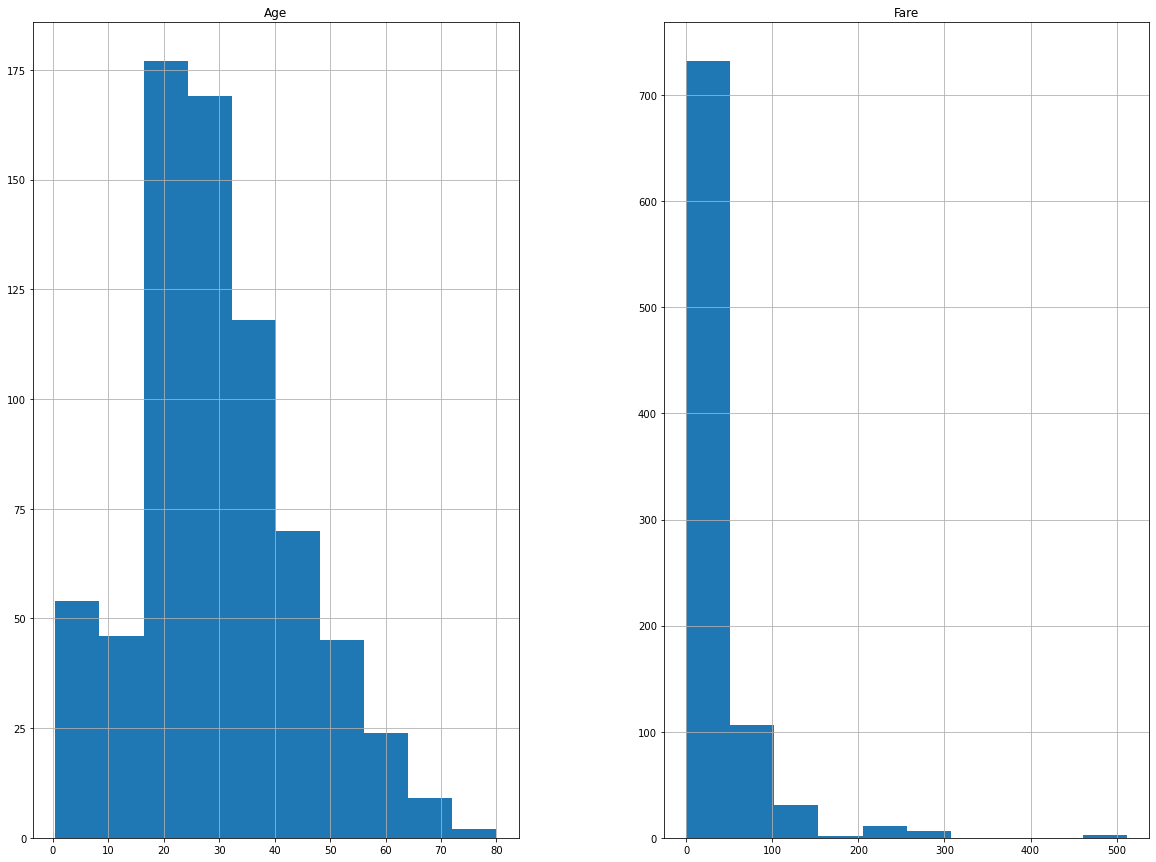

In [7]:
import matplotlib.pyplot as plt
freqgraph = df.select_dtypes(include=['float'])     
freqgraph.hist(figsize=(20,15))
plt.show()

In [8]:
#checking for the null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there is a missing values in the columns Age,Cabin,and Embarked

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
#filling the nullvalues in Embarked and Cabin columns
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
#Dropping PassengerId,Name,Ticket,Cabin(Since most values are unknown),and recently added 'Title' column
#Taking only those columns which are helpful in training the model.
df1=df.copy()
df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [15]:
# Encoding the categorical columns
df1['Sex'] = df1['Sex'].replace(["female", "male"], [0, 1])
df1['Embarked'] = df1['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

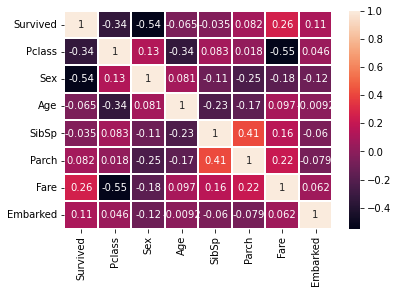

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=df1.corr()
sns.heatmap(corr_matrix,linewidths=0.2,annot=True)
plt.show()

In [17]:
df1.drop(['Fare'],axis=1,inplace=True)

In [18]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
df1[['Age']]=standardisation.fit_transform(df1[['Age']])

In [19]:
# spliiting the dataset into features and target
#Taking survived as the target and all other as features
X=df1.drop(['Survived'],axis=1)
y=df1['Survived']
# splitting into test and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [20]:
X_train.shape

(712, 6)

In [21]:
X_test.shape

(179, 6)

In [22]:
#Naive Bayes classifier on the data set
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)
y_pred=NB_model.predict(X_test)

In [23]:

y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [24]:
# Evaluating the model using confusion matrix and accuracy score

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[80, 25],
       [17, 57]], dtype=int64)

In [26]:
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))

Accuracy is: 0.765


In [27]:
# Dsplaying the parameters in GaussianNB
print(NB_model.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [28]:
# Using GridSearchCV to find the optimum parameters
import numpy as np
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB_grid = GridSearchCV(estimator=GaussianNB(), 
                 param_grid=params_NB, 
                 cv=10,   
                 verbose=1, 
                 scoring='accuracy') 
NB_grid.fit(X_train, y_train)
print(NB_grid.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.01519911082952933}


In [29]:
y_pred=NB_grid.best_estimator_.predict(X_test)

In [30]:
#Evaluating the model

In [31]:
confusion_matrix(y_test,y_pred)

array([[78, 27],
       [17, 57]], dtype=int64)

In [32]:
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))

Accuracy is: 0.754
